In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image
import os

In [25]:
def create_incomplete_img_randomLines(img, mask_size_range_ratio=(0.01,0.08), mask_greyscale_value = 0.5):

    ## Prepare masking matrix

    mask = np.full(img.shape, 1, np.float32) ## White background

    n , m , d = img.shape
    size = np.min((n, m))
    min_ratio , max_ratio = mask_size_range_ratio
    for _ in range(np.random.randint(1, 10)):

        # Get random x locations to start line

        x1 , x2 = np.random.randint(1, n), np.random.randint(1, n)

        # Get random y locations to start line

        y1, y2 = np.random.randint(1, m), np.random.randint(1, m)

        # Get random thickness of the line drawn

        thickness = np.random.randint(int(size*min_ratio), int(size*max_ratio))

        # Draw black line on the white mask

        cv2.line(mask,(x1,y1),(x2,y2),(0,0,0),thickness)

    ## Mask the image

    masked_image = img.copy()

    masked_image[mask==0] = mask_greyscale_value

    return masked_image, mask

def create_incomplete_img(img,mask_size_range_ratio=(0.2,0.3), mask_greyscale_value = 0.5):
    
    n, m, d= img.shape
    mask = np.ones((n, m, d))
    size = np.min((n, m))

    min_ratio , max_ratio = mask_size_range_ratio
    mask_size = np.random.randint(int(size*min_ratio), int(size*max_ratio))
    x = np.random.randint(0, n - mask_size)
    y = np.random.randint(0, m - mask_size)
    mask[x:x+mask_size, y:y+mask_size, :] = 0
    # img = img * mask
    img = np.where(mask == 0, mask_greyscale_value, img)
    
    return img, mask

def create_incomplete_img_fixed(img,mask_size_ratio = 0.4 , mask_greyscale_value = 0.5):
    
    n, m, d= img.shape
    mask = np.ones((n, m, d))
    size = np.min((n, m))
    
    mask_size = int(size*mask_size_ratio)

    x = int((n - mask_size)/2)
    y = int((m - mask_size)/2)
    mask[x:x+mask_size, y:y+mask_size, :] = 0
    # img = img * mask
    img = np.where(mask == 0, mask_greyscale_value, img)
    
    return img, mask

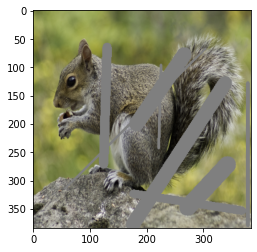

In [27]:
HR_path = 'train_data/realistic_nature_100/train_HR/'
type_end = '.png'
HR_imgs_prefix = ''

directory_HR = os.fsencode(HR_path)

files_HR = os.listdir(directory_HR)
files_HR = [os.fsdecode(file) for file in files_HR if os.fsdecode(file).endswith(type_end) 
                                                    and os.fsdecode(file).startswith(HR_imgs_prefix)]

files_HR.sort()

for img_file in files_HR:
    img_HR = plt.imread(HR_path+img_file)

    img_incomplete, mask = create_incomplete_img_randomLines(img_HR ,mask_greyscale_value = 0.5)
    # img_incomplete, mask= create_incomplete_img(img_HR ,mask_size_range_ratio=(0.2,0.4), mask_greyscale_value = 0.5)
    # img_incomplete, mask= create_incomplete_img_fixed(img_HR,mask_size_ratio=0.4, mask_greyscale_value = 0.5)

    img_incomplete = Image.fromarray((img_incomplete * 255.0).astype(np.uint8))
    img_incomplete.save(f'./train_data/realistic_nature_100/incomplete_HR_randomLines/{img_file}')
    # img_incomplete.save(f'./train_data/realistic_nature_100/incomplete_HR/{img_file}')
    # img_incomplete.save(f'./train_data/realistic_nature_100/incomplete_HR_fixed/{img_file}')

    

plt.imshow(img_incomplete)
plt.show()

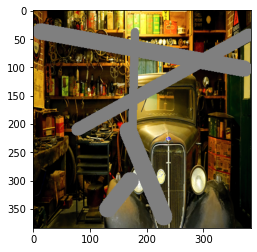

In [29]:
HR_path = 'test_data/realistic_nature_100/test_HR/'
type_end = '.png'
HR_imgs_prefix = ''

directory_HR = os.fsencode(HR_path)

files_HR = os.listdir(directory_HR)
files_HR = [os.fsdecode(file) for file in files_HR if os.fsdecode(file).endswith(type_end) 
                                                    and os.fsdecode(file).startswith(HR_imgs_prefix)]

files_HR.sort()

for img_file in files_HR:
    img_HR = plt.imread(HR_path+img_file)

    img_incomplete, mask = create_incomplete_img_randomLines(img_HR ,mask_greyscale_value = 0.5)
    # img_incomplete, mask= create_incomplete_img(img_HR ,mask_size_range_ratio=(0.2,0.4), mask_greyscale_value = 0.5)
    # img_incomplete, mask= create_incomplete_img_fixed(img_HR,mask_size_ratio=0.4, mask_greyscale_value = 0.5)

    img_incomplete = Image.fromarray((img_incomplete * 255.0).astype(np.uint8))
    img_incomplete.save(f'./test_data/realistic_nature_100/incomplete_HR_randomLines/{img_file}')
    # img_incomplete.save(f'./test_data/realistic_nature_100/incomplete_HR/{img_file}')
    # img_incomplete.save(f'./test_data/realistic_nature_100/incomplete_HR_fixed/{img_file}')


plt.imshow(img_incomplete)
plt.show()